In [7]:
import numpy as np
import pandas as pd
import pandas.plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
iris=pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [10]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.shape

(150, 5)

In [12]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [13]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
iris.isnull().sum().sum()

0

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

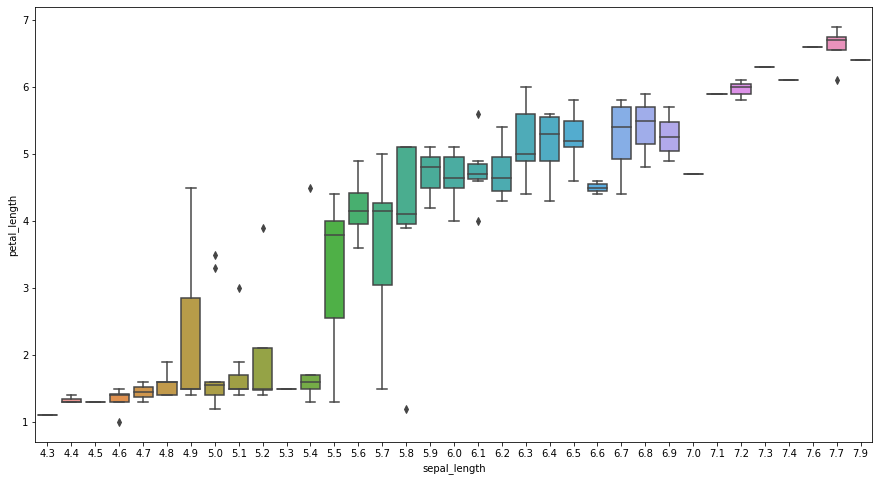

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(x='sepal_length',y='petal_length',data=iris.sort_values('sepal_length',ascending=False))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


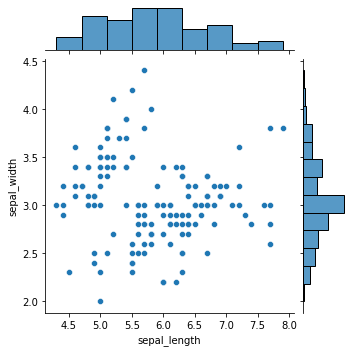

In [16]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


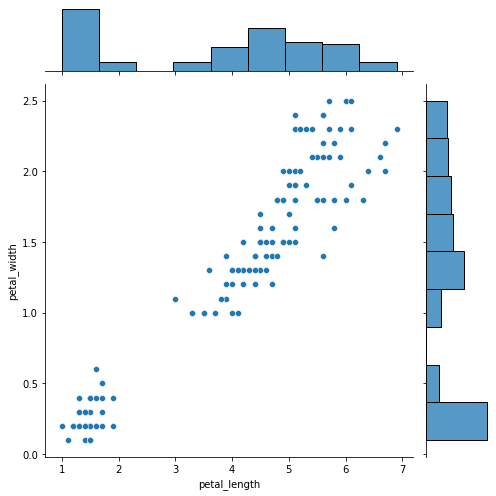

In [17]:
sns.jointplot(x="petal_length", y="petal_width", data=iris, size=7)

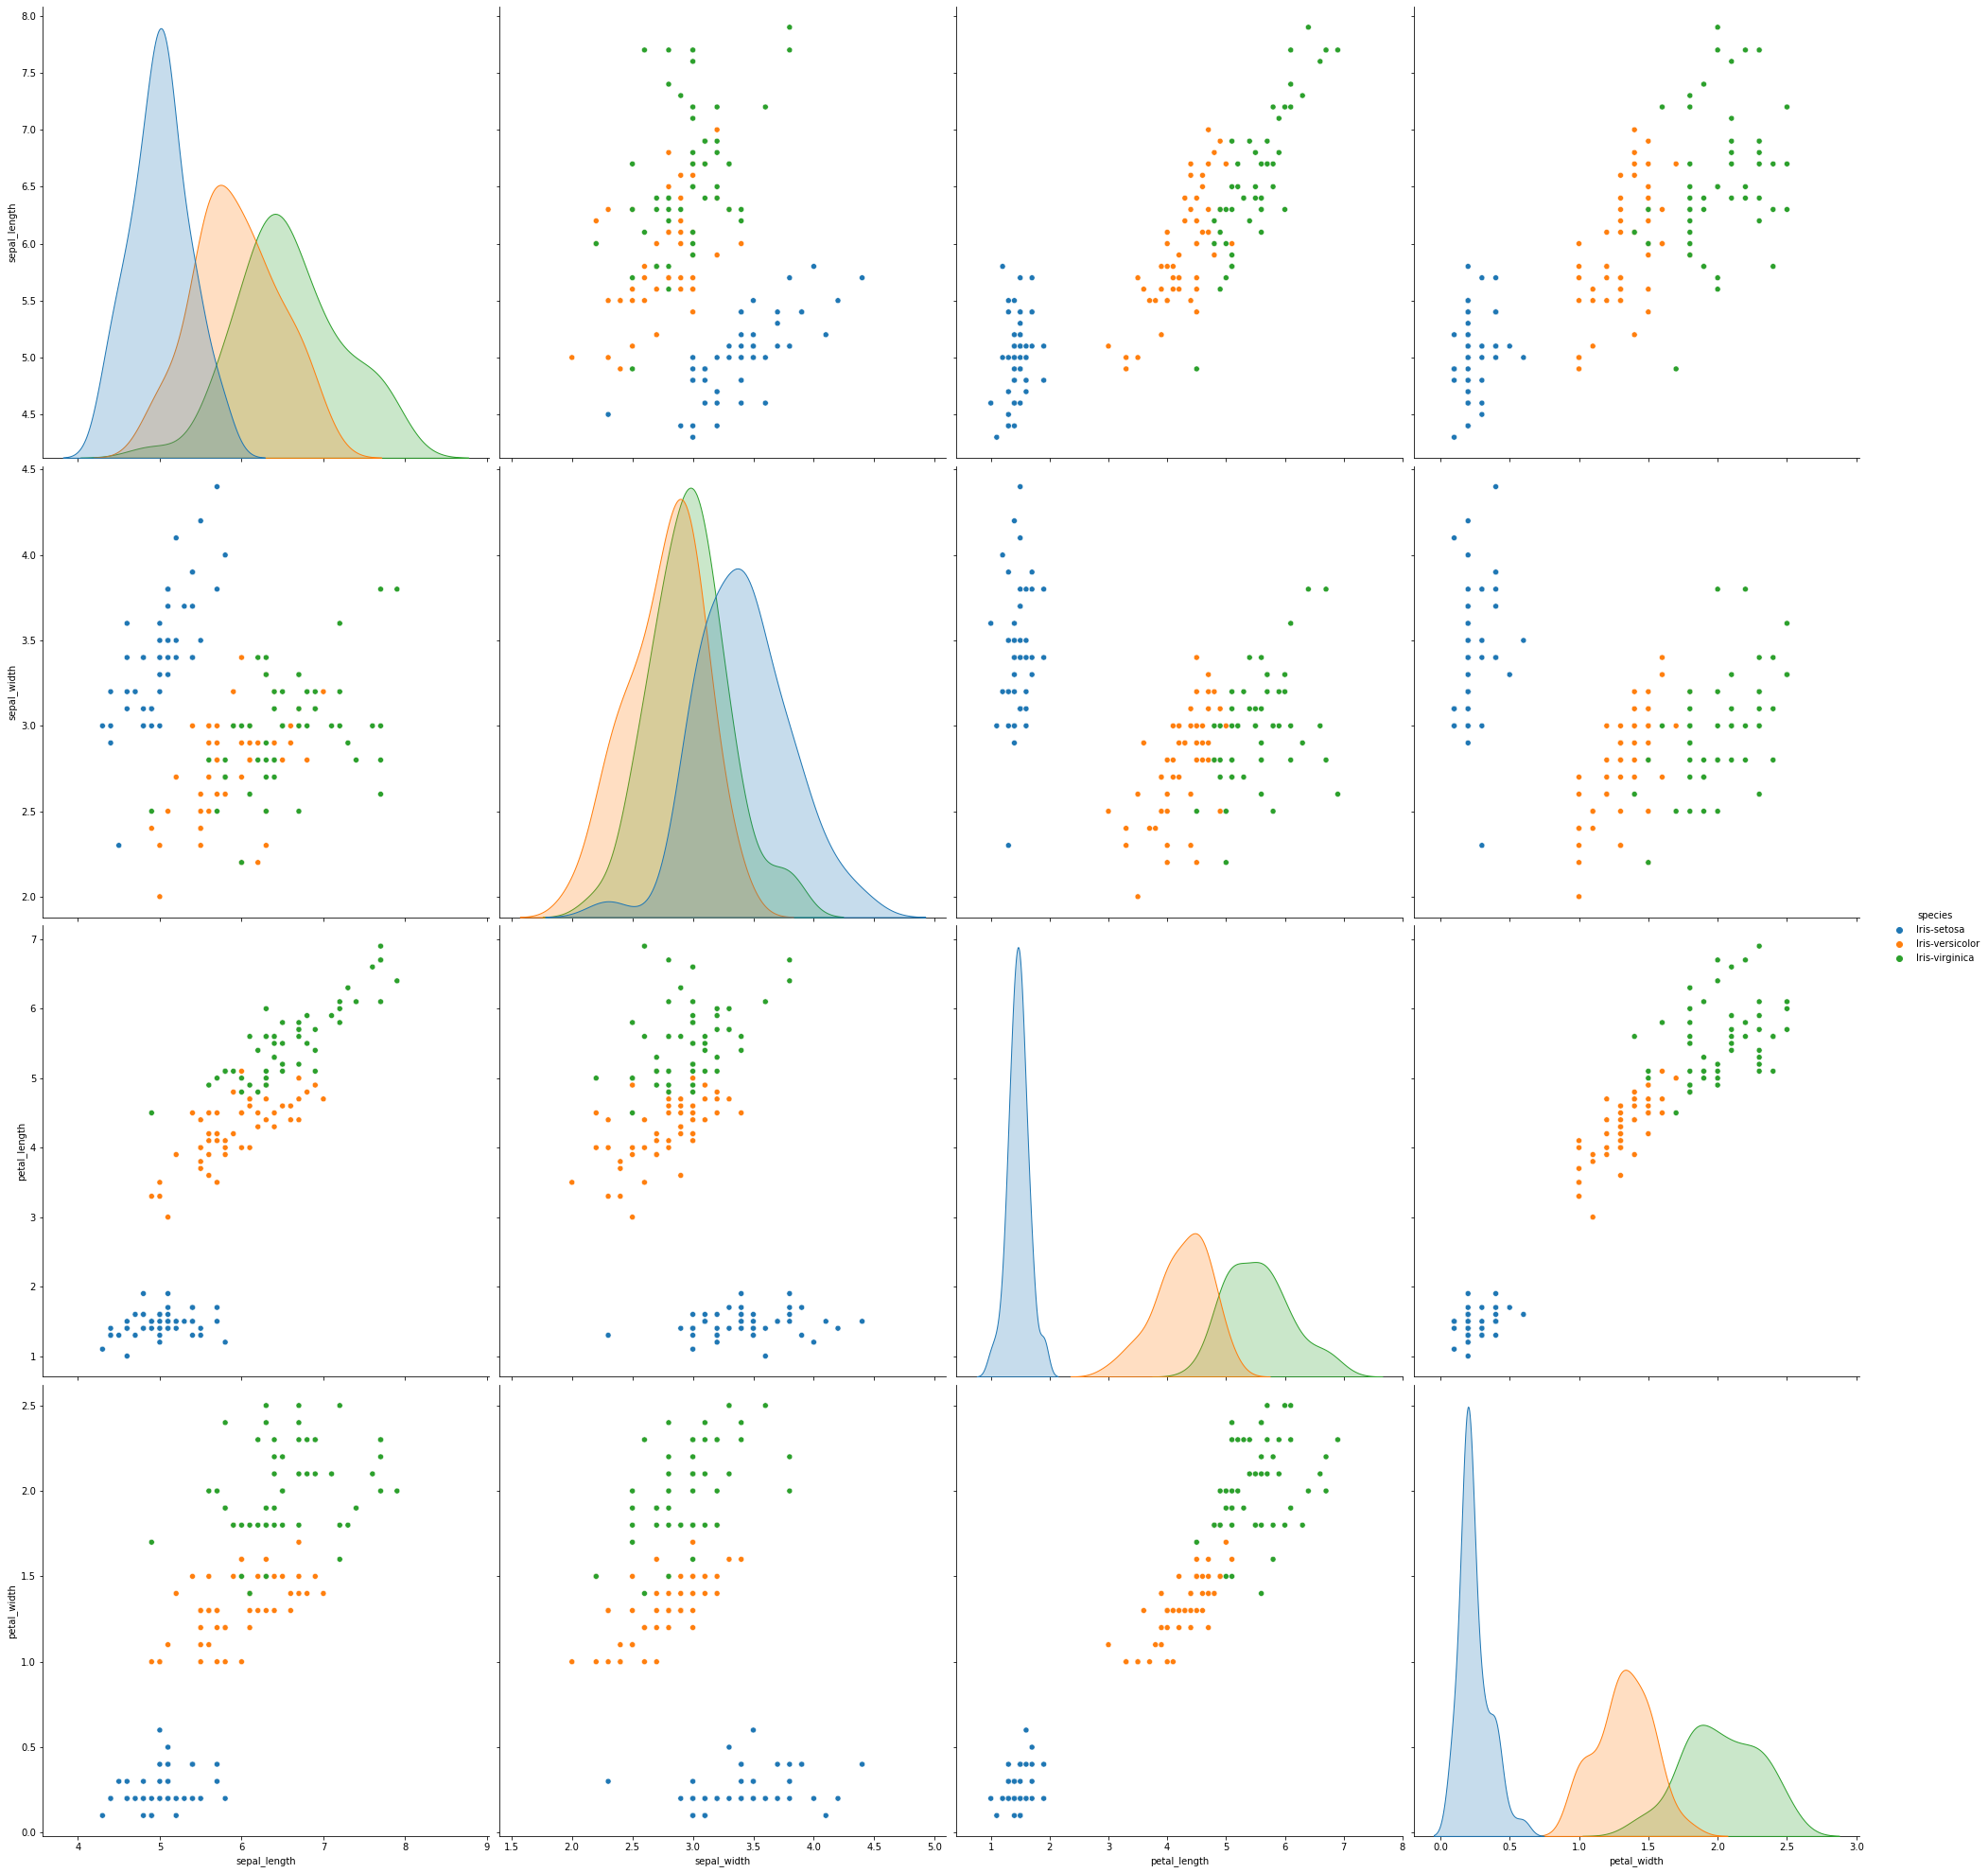

In [18]:
sns.pairplot(iris, hue="species", height=7)

<AxesSubplot:>

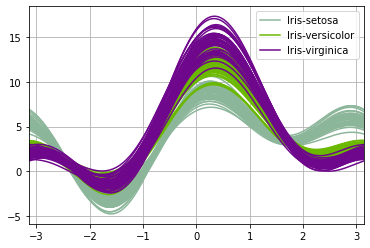

In [19]:
from pandas.plotting import andrews_curves
andrews_curves(iris, "species")

<Figure size 1440x1440 with 0 Axes>

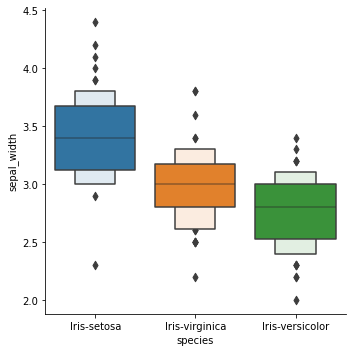

In [20]:
plt.figure(figsize=(20,20))
sns.catplot(x='species',y='sepal_width',data=iris.sort_values('sepal_width',ascending=False),kind='boxen')

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

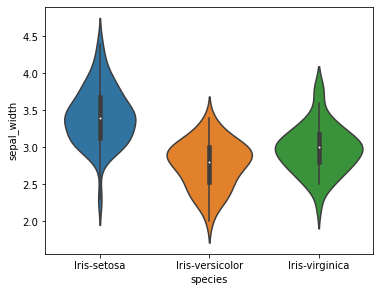

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(3,3,4)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,3,4)
sns.violinplot(x='species',y='sepal_width',data=iris)

In [22]:
X=iris.drop('species',axis=1)
y=iris['species']

In [23]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [24]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [26]:
iris['species'] = pd.Categorical(iris.species)
iris['species'] = iris.species.cat.codes
y = to_categorical(iris.species)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [28]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))
model.add(Dense(3,activation='softmax'))

C:\Users\ads\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3365 - loss: 1.2255 - val_accuracy: 0.3333 - val_loss: 1.1657
Epoch 2/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2959 - loss: 1.1178 - val_accuracy: 0.3111 - val_loss: 1.0691
Epoch 3/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3292 - loss: 1.0522 - val_accuracy: 0.3333 - val_loss: 1.0056
Epoch 4/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3250 - loss: 1.0119 - val_accuracy: 0.5333 - val_loss: 0.9561
Epoch 5/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5827 - loss: 0.9579 - val_accuracy: 0.4889 - val_loss: 0.9149
Epoch 6/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6421 - loss: 0.9002 - val_accuracy: 0.6667 - val_loss: 0.8789
Epoch 7/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6302 - loss: 0.8599 - val_accuracy: 0.6667 - val_loss: 0.8430
Epoch 8/45
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.8151 - val_accuracy: 0.6667 - val_loss: 0.8160
Epoch 9

In [31]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9748 - loss: 0.3662 


[0.36306649446487427, 0.9777777791023254]

In [32]:
pred = model.predict(X_test[:10])
print(pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.01204895 0.51542515 0.47252586]
 [0.88692683 0.10169368 0.01137952]
 [0.05866745 0.6350904  0.3062422 ]
 [0.02948298 0.6294354  0.3410816 ]
 [0.93717456 0.05724347 0.00558202]
 [0.00166394 0.35395372 0.64438236]
 [0.0109641  0.5081533  0.48088259]
 [0.01712571 0.5390212  0.4438531 ]
 [0.0027054  0.36295745 0.63433707]
 [0.00252857 0.31065512 0.68681633]]


In [33]:
history.history['accuracy']

[0.3333333432674408,
 0.27619048953056335,
 0.3333333432674408,
 0.3333333432674408,
 0.6285714507102966,
 0.6285714507102966,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6761904954910278,
 0.7047619223594666,
 0.7047619223594666,
 0.6761904954910278,
 0.6761904954910278,
 0.7428571581840515,
 0.9047619104385376,
 0.9523809552192688,
 0.8952381014823914,
 0.8285714387893677,
 0.8190476298332214,
 0.8761904835700989,
 0.8380952477455139,
 0.8476190567016602,
 0.9047619104385376,
 0.9047619104385376,
 0.8571428656578064,
 0.8857142925262451,
 0.9523809552192688,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613]

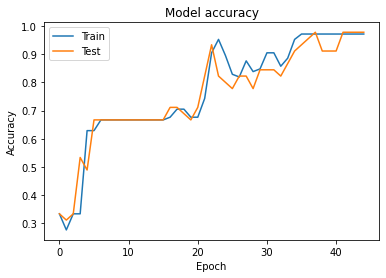

In [34]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()